# 밀도 차이가 별로 없는 데이터 dbscan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('seaborn')
sns.set_palette('hls')
warnings.filterwarnings('ignore')

In [4]:
# 드라이브 마운트
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
# 데이터 불러오기
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data = data.rename(columns={"Genre" : "Gender"})

In [7]:
data = data.drop('CustomerID', axis=1)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
data['Gender'] = np.where(data['Gender'] == 'Male', 0, 1)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [9]:
data.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


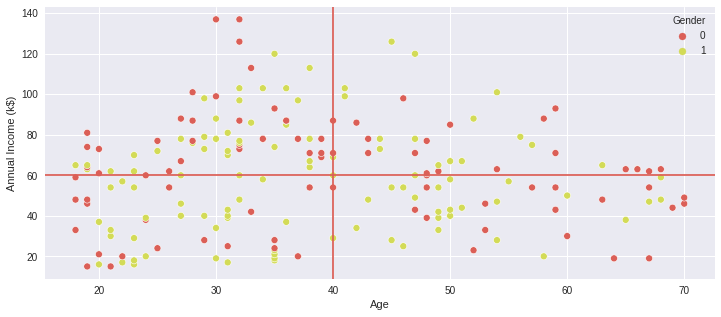

In [11]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=data, hue='Gender')
plt.axvline(40, 0, 100)
plt.axhline(60, 0, 80)
plt.show()

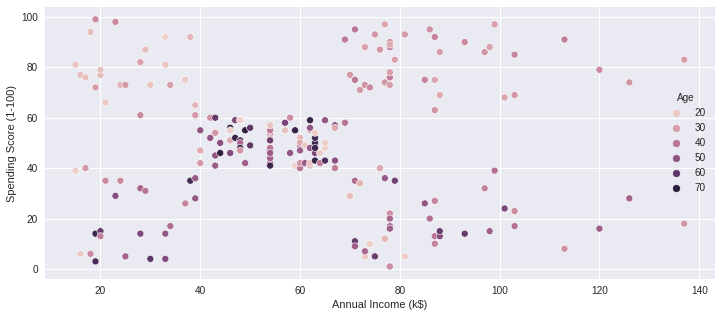

In [12]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue='Age')
plt.show()

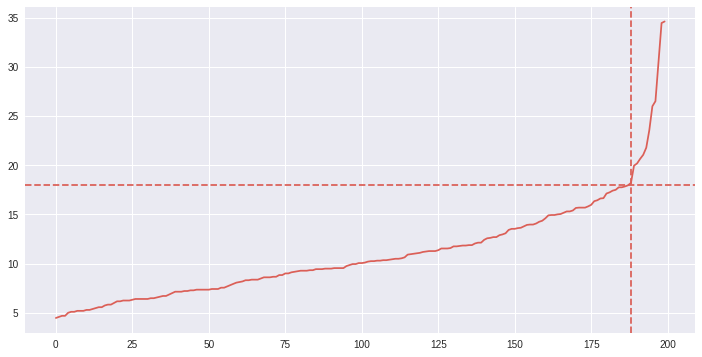

18.193405398660254


In [14]:
from sklearn.neighbors import NearestNeighbors

# 각 개체마다 거리를 계산해 가까운 거리의 5개와 묶는다
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(data)
distances, indices = neigh.kneighbors(data)

# distance 18을 eps로, 4를 minpts로
plt.figure(figsize=(12,6))
plt.plot(np.sort(distances[:, 4]))
plt.axvline(188, 0, 2, ls='--')
plt.axhline(18, 0, 200, ls='--')

plt.show()

print(np.sort(distances[:, 4])[188])

In [25]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
data_scaled = pd.DataFrame(standard_scaler.fit_transform(data), columns=data.columns)

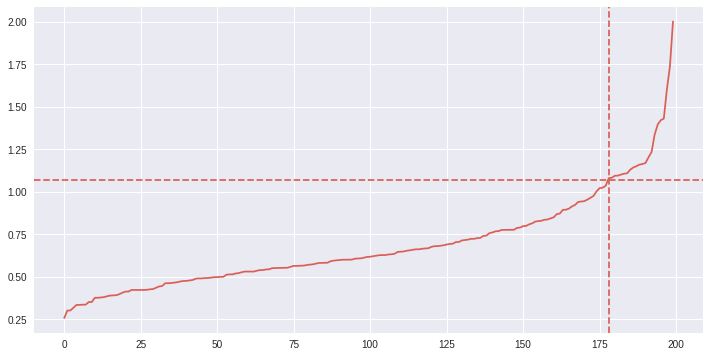

1.0792036945604633


In [26]:
# 각 개체마다 거리를 계산해 가까운 거리의 5개와 묶는다
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(data_scaled)
distances, indices = neigh.kneighbors(data_scaled)

plt.figure(figsize=(12,6))
plt.plot(np.sort(distances[:, 4]))
plt.axvline(178, 0, 2, ls='--')
plt.axhline(1.07, 0, 200, ls='--')

plt.show()

print(np.sort(distances[:, 4])[178])

### scaling 하지 않았을 경우

[-1  0]


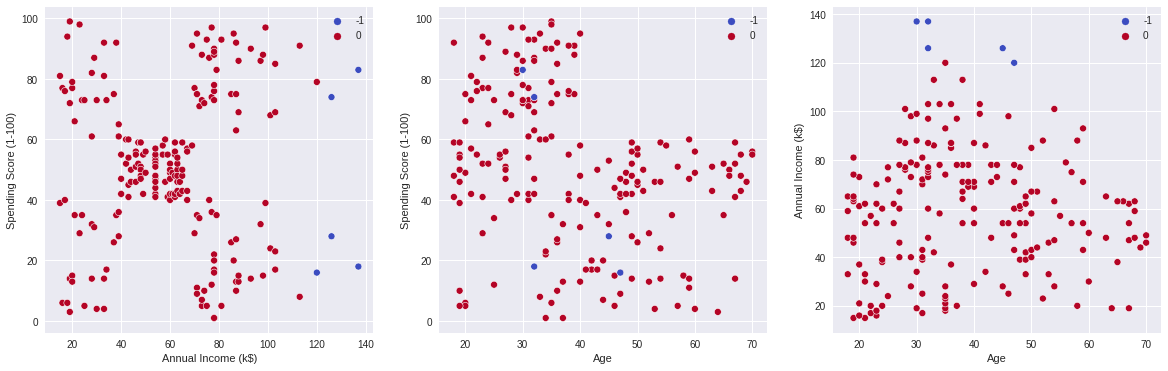

In [28]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=18, min_samples=4)
dbscan.fit(data)

print(np.unique(dbscan.labels_))

plt.figure(figsize=(20,6))
plt.subplot(131)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue=dbscan.labels_, palette='coolwarm')
plt.subplot(132)
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=data, hue=dbscan.labels_, palette='coolwarm')
plt.subplot(133)
sns.scatterplot(x='Age', y='Annual Income (k$)', data=data, hue=dbscan.labels_, palette='coolwarm')

[-1  0  1]


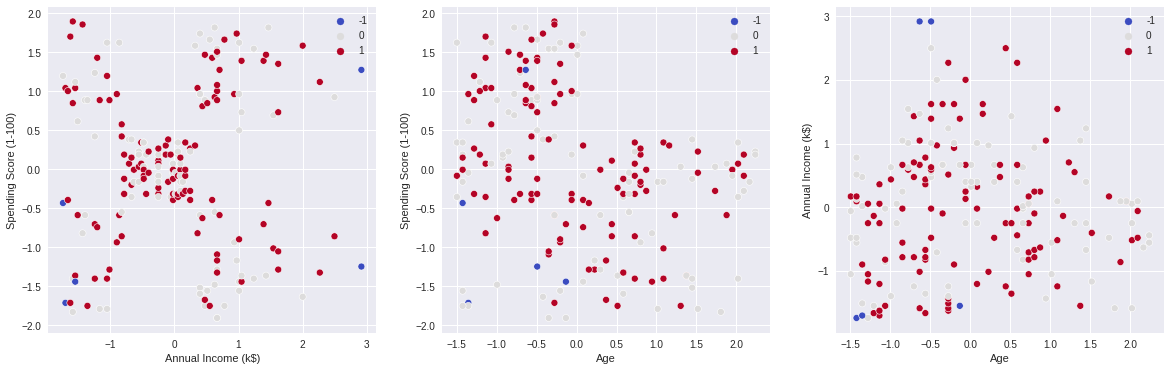

In [29]:
dbscan = DBSCAN(eps=1.07, min_samples=4)
dbscan.fit(data_scaled)
print(np.unique(dbscan.labels_))

plt.figure(figsize=(20,6))
plt.subplot(131)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data_scaled, hue=dbscan.labels_, palette='coolwarm')
plt.subplot(132)
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=data_scaled, hue=dbscan.labels_, palette='coolwarm')
plt.subplot(133)
sns.scatterplot(x='Age', y='Annual Income (k$)', data=data_scaled, hue=dbscan.labels_, palette='coolwarm')

> https://tobigs.gitbook.io/tobigs/data-analysis/undefined-3/python-2-1